In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]



In [4]:
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [5]:
X = pd.concat([X, geography, gender], axis=1)

In [6]:
X.drop(["Gender", "Geography"],axis = 1, inplace=True)

In [7]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [8]:
x_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(X_test)

In [10]:
import keras
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import ReLU,PReLU,LeakyReLU,ELU,Dense
from keras._tf_keras.keras.initializers import HeNormal,GlorotUniform, HeUniform

In [11]:
classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer =HeUniform(), input_shape=(11,)))
classifier.add(LeakyReLU(alpha=0.01))

classifier.add(Dense(units = 6, kernel_initializer =HeUniform()))
classifier.add(LeakyReLU(alpha=0.01))

classifier.add(Dense(units = 1, kernel_initializer =  GlorotUniform(), activation = "sigmoid"))

classifier.compile(optimizer= "adam", loss= "binary_crossentropy", metrics= ["accuracy"])


c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Sanket Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [12]:
model_history = classifier.fit(x_train,y_train, validation_split = 0.33, batch_size=10, epochs = 100)
model_history.history.keys()

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7936 - loss: 0.5522 - val_accuracy: 0.7891 - val_loss: 0.4802
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8048 - loss: 0.4581 - val_accuracy: 0.7967 - val_loss: 0.4528
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7967 - loss: 0.4478 - val_accuracy: 0.8001 - val_loss: 0.4406
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8091 - loss: 0.4313 - val_accuracy: 0.8031 - val_loss: 0.4334
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8176 - loss: 0.4172 - val_accuracy: 0.8065 - val_loss: 0.4280
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8131 - loss: 0.4150 - val_accuracy: 0.8092 - val_loss: 0.4247
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8120 - loss: 0.4182 - val_accuracy: 0.8156 - val_loss: 0.4200
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8218 - loss: 0.4043 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [13]:
pred = classifier.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [14]:
pred = pred > 0.5

In [15]:
from sklearn.metrics import accuracy_score


accuracy_score(Y_test,pred)

0.8625

In [16]:
dataset.shape

(10000, 14)

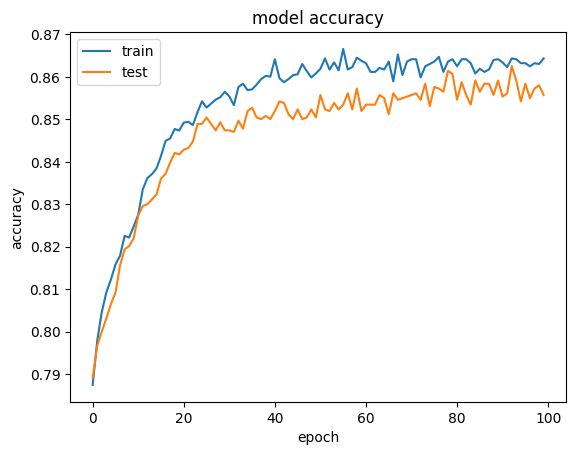

In [17]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"], loc="upper left")
plt.show()

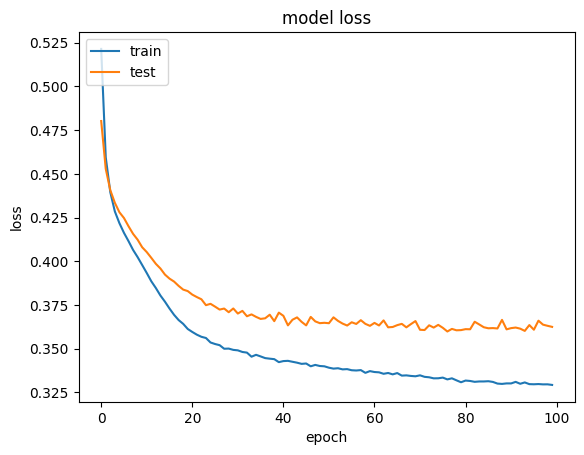

In [18]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"], loc="upper left")
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(Y_test,pred)

In [20]:
cm

array([[1518,   77],
       [ 198,  207]], dtype=int64)